In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
# Read data
data = pd.read_excel('oxygenpurity.xls')

# Set the values of x_i's and y_i's 
x = np.reshape(np.array(data['hydro']), (-1, 1))
y = np.reshape(np.array(data['purity']), (-1, 1))


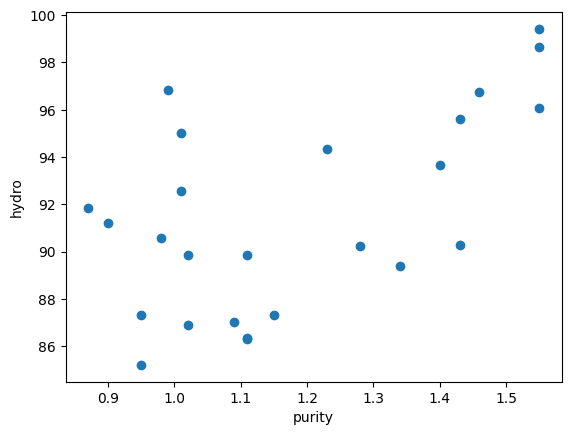

In [7]:
# Let's plot data and see the linear relationship between x and y.
plt.scatter(x,y)
plt.xlabel('purity')
plt.ylabel('hydro')
plt.show()

1) Fit a simple linear regression model to the data and find the coefficients.

In [8]:
model =LinearRegression()
model.fit(x,y)

beta_1 = model.coef_[0][0]
beta_0 = model.intercept_[0]

print('beta_0 =', beta_0)
print('beta_1 =', beta_1)

beta_0 = 78.90305691538006
beta_1 = 10.713244391844638


<AxesSubplot:xlabel='purity', ylabel='hydro'>

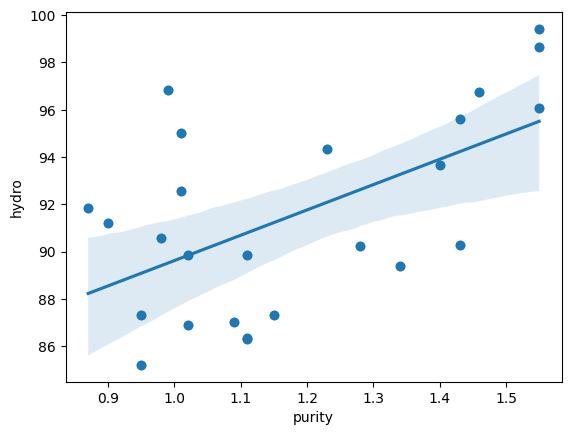

In [11]:
# See the plot adding the regression line on it. 

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('purity')
ax.set_ylabel('hydro')

sns.regplot(x=x, y=y, ax=ax)

2) Test the hypothesis H_0 : beta_1 = 0 and conclude if there is significant linear relationship between the purit and hydro.

In [12]:
X = data['hydro']
Y = data['purity']
n=len(X)
df = n - 2   # Degrees of freedom


residuals = Y - (beta_0 + beta_1 * X)
SSE = np.inner(residuals, residuals)
variance_estimate = SSE / df
standard_error_beta1 = np.sqrt(variance_estimate) / np.sqrt(np.inner(X - np.mean(X), X - np.mean(X)))

t_statistic = beta_1 / standard_error_beta1
alpha = 0.05
t_critical = abs(np.round(stats.t.ppf(alpha / 2, df), 2))
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

print('t-statistic is ', t_statistic)
print('t-critical is ', t_critical)
print('p-value is ', p_value)

t-statistic is  3.344170811534466
t-critical is  2.07
p-value is  0.0028140035991914836


Since |t_statistic| > t_critical, the hypothesis is rejected. There is a significant linear relationship between X and Y.

3) Calculate the coefficient of the determination, r^2.

In [13]:
SST = np.inner((Y - np.mean(Y)), (Y - np.mean(Y)))
r_square = 1 - (SSE / SST)

print('r^2 is ', r_square)

r^2 is  0.32716033986901916


(4) Find a 95% confidence interval on the slope.

In [14]:
margin_of_error = t_critical * standard_error_beta1
confidence_interval = (beta_1 - margin_of_error, beta_1 + margin_of_error)

print('95% Confidence Interval beta_1 is ', confidence_interval)

95% Confidence Interval beta_1 is  (4.081879805254399, 17.344608978434877)


(5) Find a 95% confidence interval on the mean purity when the hydrocarbon percentage is 1.05.

In [15]:
X_new = 1.05
Y_predicted = beta_0 + beta_1 * X_new

MSE = np.inner(residuals, residuals) / df
standard_error_prediction = np.sqrt(MSE * (1 + 1/n + ((X_new - np.mean(X))**2) / np.inner((X - np.mean(X)), (X - np.mean(X)))))
ME = t_critical * standard_error_prediction    # Margin of error
confidence_interval_new = (Y_predicted - ME, Y_predicted + ME)

print('Confidence interval for the hydrocarbon percentage 1.05 is ',  confidence_interval_new)

Confidence interval for the hydrocarbon percentage 1.05 is  (82.7257825880586, 97.57814446557525)


(6) What is the correlation coefficient r between Y and X?

In [16]:
covariance = np.inner((X - np.mean(X)), (Y - np.mean(Y))) / (n-1)
standard_deviation_X = np.sqrt(np.inner((X - np.mean(X)), (X - np.mean(X)))/(n-1))
standard_deviation_Y = np.sqrt(np.inner((Y - np.mean(Y)), (Y - np.mean(Y)))/(n-1))
correlation_coefficient = covariance / (standard_deviation_X * standard_deviation_Y)

print('Correlation coefficient between X and Y is ', correlation_coefficient)

Correlation coefficient between X and Y is  0.57197931769341


(7) Test the hypothesis: H_0 : p = 0 against H_A : ρ  \notequal 0 using a t-test
     based on the correlation coefficient r computed from the previous step.

In [17]:
t_statistic = (correlation_coefficient * np.sqrt(df)) / np.sqrt(1 - correlation_coefficient**2)

print('t-statistic is ', t_statistic)
print('Critical t-value at alpha/2 is ', t_critical)

t-statistic is  3.3441708115344655
Critical t-value at alpha/2 is  2.07


Since abs(t_statistic) > t_critical, the null hypothesis is rejected.
There is a significant linear relationship between X and Y.